# Aperture Photometry and Registration of Project01

In [1]:
#Stating theme
import jupyterthemes as jt
!jt -t solarizedl -T -N -kl -nfs 11 -fs 11 -ofs 11 -cursc r -cellw 90%
jt.jtplot.style()
jt.get_themes()

['chesterish',
 'grade3',
 'gruvboxd',
 'gruvboxl',
 'monokai',
 'oceans16',
 'onedork',
 'solarizedd',
 'solarizedl']

In [1]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

import astropy
from astropy.table import table
from astropy.io import fits
from astropy.wcs import WCS

from dlnpyutils import coords

import prometheus

In [2]:
# %matplotlib notebook
%matplotlib inline

In [3]:
ls *_proc.fits

 Volume in drive C is OS
 Volume Serial Number is 4E89-5B0C

 Directory of C:\Users\WillsPc\GitHub\ObservationalAstro_PHSX491\project01

11/02/2021  02:20 PM        82,212,480 CCD Image 123_proc.fits
11/02/2021  02:20 PM        82,212,480 CCD Image 124_proc.fits
11/02/2021  02:20 PM        82,212,480 CCD Image 125_proc.fits
11/02/2021  02:20 PM        82,212,480 CCD Image 126_proc.fits
11/02/2021  02:20 PM        82,212,480 CCD Image 127_proc.fits
11/02/2021  02:20 PM        82,212,480 CCD Image 128_proc.fits
11/02/2021  02:20 PM        82,212,480 CCD Image 129_proc.fits
11/02/2021  02:20 PM        82,212,480 CCD Image 138_proc.fits
11/02/2021  02:20 PM        82,212,480 CCD Image 139_proc.fits
11/02/2021  02:20 PM        82,212,480 CCD Image 362_proc.fits
11/02/2021  02:20 PM        82,212,480 CCD Image 363_proc.fits
11/02/2021  02:20 PM        82,212,480 TransitSet11-0002R_proc.fits
11/02/2021  02:20 PM        82,212,480 TransitSet11-0003B_proc.fits
11/02/2021  02:21 PM        82,212

CCD Image 363_proc.fits


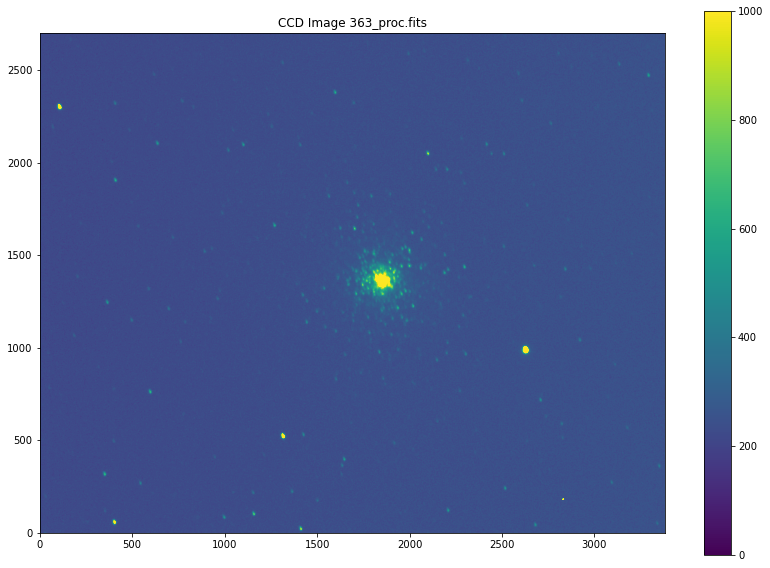

TransitSet11-0004G_proc.fits


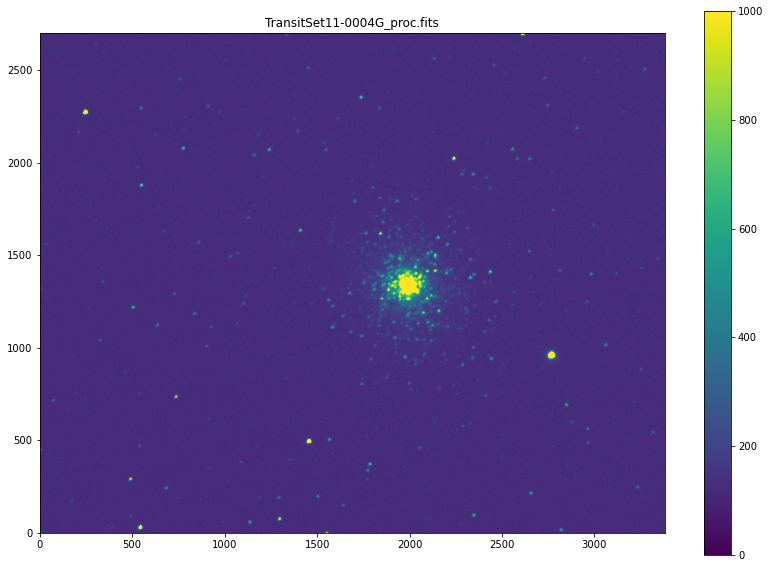

TransitSet11-0004R_proc.fits


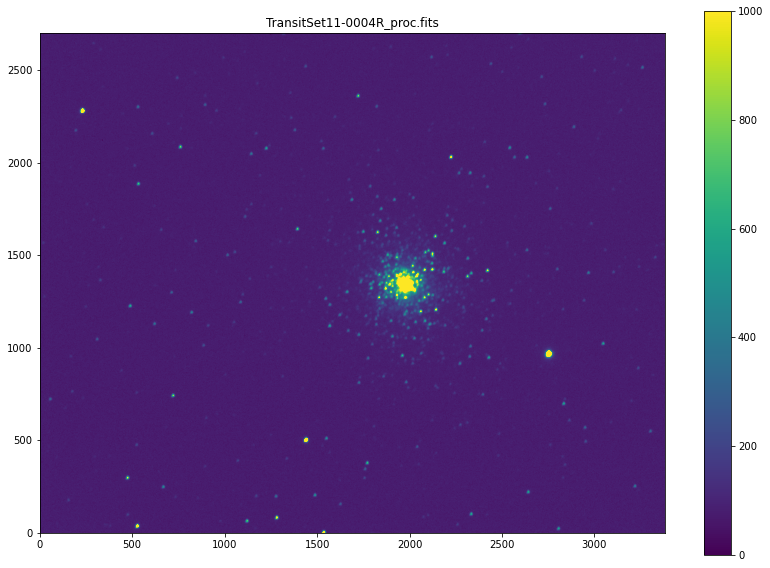

In [4]:
names = ['CCD Image 363_proc.fits', 'TransitSet11-0004G_proc.fits', 'TransitSet11-0004R_proc.fits']
for i in names:
    print(i)
    im, head = fits.getdata(i, 0 , header=True)
    plt.figure(figsize=(14,10))
    plt.imshow(im, vmin = 0, vmax=1000, origin='lower')
    plt.title(i)
    plt.grid(False)
    plt.colorbar()
    plt.show()

### Choice canidates: 
<ul>
    <li>TransitSet11-0004G_proc.fits </li>
    <li>TransitSet11-0004B_proc.fits </li>
    <li>TransitSet11-0004R_proc.fits </li>
    <li>TransitSet11-0005G_proc.fits </li> 
    <li>TransitSet11-0005R_proc.fits </li>
</ul>
Gosh darn are we lucky to have at least one of each color... The ones chosen seem to have minimum streaking and removed most of the background.

The target to be focused on for the rest of the development will be: <b> TransitSet11-0004G_proc.fits </b>

### The steps that need to be taken: 
<ol>
    <li> background estimation and subtraction (?)</li>
    <li> Detection using DaoStarFinder </li>
    <li> If the detection above doesn't seem to work, try using psf photometry (the funky guassian fit shit). </li>
    <li> Create Apetures for each star and measure the flux </li>
    <li> Create WCS item for the image </li>
    <li> Registration against SDSS </li>
    <li> Create CMD for SDSS stars </li>
    <li> Create CMD for our data </li>
    <li> Repeat in all three colors </li>
</ol>

In [6]:
# Loading in all images and processing their photometry
print("Running 0004 Green:")
imG_4, headG_4 = fits.getdata('TransitSet11-0004G_proc.fits', 0 , header=True)
CCDDatG_4 = prometheus.ccddata.CCDData.read('TransitSet11-0004G_proc.fits')
catG_4,modelG_4,skyG_4,psfG_4 = prometheus.run(CCDDatG_4,'penny',verbose=True,lookup=True)
print()

print("Running 0004 Red:")
imR_4, headR_4 = fits.getdata('TransitSet11-0004R_proc.fits', 0 , header=True)
CCDDatR_4 = prometheus.ccddata.CCDData.read('TransitSet11-0004R_proc.fits')
catR_4,modelR_4,skyR_4,psfR_4 = prometheus.run(CCDDatR_4,'penny',verbose=True,lookup=True)
print()

print("Running 0004 Blue:")
imB_4, headB_4 = fits.getdata('CCD Image 363_proc.fits', 0 , header=True)
CCDDatB_4 = prometheus.ccddata.CCDData.read('TransitSet11-0004B_proc.fits')
catB_4,modelB_4,skyB_4,psfB_4 = prometheus.run(CCDDatB_4,'penny',verbose=True,lookup=True)

Running 0004 Green:
Step 1: Detection
931 objects detected
Step 2: Aperture photometry
Min/Max mag: 10.39, 16.53
Step 3: Construct the PSF
FWHM = 10.01 pixels (143 sources)
84 PSF stars found
Final PSF: PSFPenny([5.258307031759952, 4.808150366135817, 0.4, 0.10000000000000002, 5.451843454880143],binned=False,npix=51,lookup=True) FWHM=11.83
Median RMS:  0.1301
Step 4: Get PSF photometry for all 931 objects
Applying correction for exposure time 30.00 s
dt = 86.62 sec

Running 0004 Red:
Step 1: Detection
927 objects detected
Step 2: Aperture photometry
Min/Max mag: 10.10, 16.85
Step 3: Construct the PSF
FWHM =  9.72 pixels (178 sources)
91 PSF stars found
Final PSF: PSFPenny([4.661061973232565, 4.440977951384445, 0.4, 0.10000000000000002, 5.450203100913486],binned=False,npix=51,lookup=True) FWHM=10.71
Median RMS:  0.1083
Step 4: Get PSF photometry for all 927 objects
Applying correction for exposure time 30.00 s
dt = 42.72 sec

Running 0004 Blue:
Step 1: Detection
919 objects detected
Step

In [7]:
from astropy.coordinates import SkyCoord

# loading in WCS objects
wG_4 = WCS('0004G_wcs.fits')
wR_4 = WCS('0004R_wcs.fits')
wB_4 = WCS('0004B_wcs.fits')

cG_4 = SkyCoord(ra='21h29m36s', dec='12deg11m31s', frame='icrs')
wG_4.wcs.crval, wG_4.wcs.crpix = [[cG_4.ra.degree, cG_4.dec.degree], [2238.2, 2024.4]]
cR_4 = SkyCoord(ra='21h29m36s', dec='12deg11m31s', frame='icrs')
wR_4.wcs.crval, wR_4.wcs.crpix = [[cR_4.ra.degree, cR_4.dec.degree], [2223.1, 2031.9]]
cB_4 = SkyCoord(ra='21h29m36s', dec='12deg11m31s', frame='icrs')
wB_4.wcs.crval, wB_4.wcs.crpix = [[cB_4.ra.degree, cB_4.dec.degree], [2253.1, 2018.1]]

In [8]:
points_G = wR_4.wcs_world2pix(np.array(wG_4.wcs_pix2world(catG_4['xc'], catG_4['yc'], 0)).T, 0).T
points_R = wR_4.wcs_world2pix(np.array(wR_4.wcs_pix2world(catR_4['xc'], catR_4['yc'], 0)).T, 0).T
points_B = wR_4.wcs_world2pix(np.array(wB_4.wcs_pix2world(catB_4['xc'], catB_4['yc'], 0)).T, 0).T

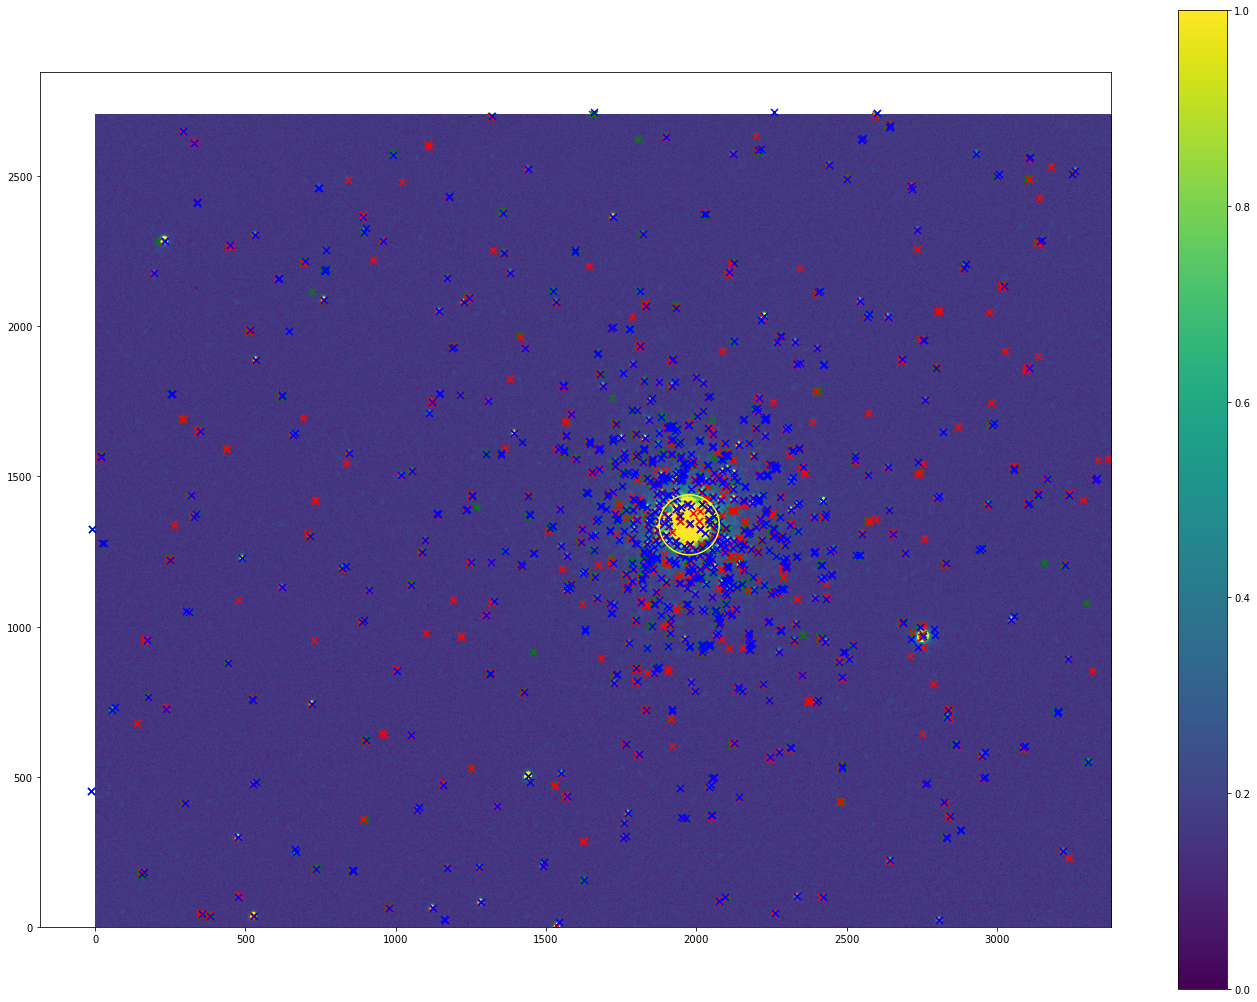

In [9]:
%matplotlib inline
#catG_4,modelG_4,skyG_4,psfG_4


plt.figure(figsize=(24,18))
# plt.subplot(projection=wR_4)
plt.imshow(imR_4,vmin=0, vmax=500,origin='lower')

theta = np.linspace( 0 , 2 * np.pi , 150 )
m15_coords = wR_4.wcs_world2pix(np.array([[SkyCoord.from_name('M15').ra.degree, SkyCoord.from_name('M15').dec.degree]]), 0)[0]

radius = 100
 
a = radius * np.cos( theta )
b = radius * np.sin( theta )
plt.plot(a+m15_coords[0],b+m15_coords[1], color='yellow')

plt.scatter(points_G[0], points_G[1], marker='x', c='g', s=50)
plt.scatter(points_R[0], points_R[1], marker='x', c='r', s=50)
plt.scatter(points_B[0], points_B[1], marker='x', c='b', s=50)

plt.colorbar()
plt.show()

In [10]:
def quick_xmatch(data1, data2, max_rad = 20):
    max_rad = max_rad**2
    set_Data, new_Data = (data1, data2) if len(data1[0]) > len(data1[0]) else (data2, data1)
    set_Data, new_Data = data1, data2
    trans_list = []
    dis_list = []
    for b in zip(new_Data[0], new_Data[1]):
        min_dis = (10e10, None)
        counter = 0
        for r in zip(set_Data[0], set_Data[1]):
            dist = (b[0]-r[0])**2 + (b[1]-r[1])**2
            if dist < min_dis[0]: min_dis = (dist, counter)
            counter += 1
        dis_list.append(min_dis[0])
        if min_dis[1] in trans_list:
            index = trans_list.index(min_dis[1])
            if min_dis[0] < dis_list[index]:
                trans_list.append(min_dis[1])
                trans_list[index] = None
            else:
                trans_list.append(None)
        else:
            trans_list.append(min_dis[1])
        if min_dis[0] > max_rad: trans_list[-1] = None
    return trans_list

In [11]:
def mag_match(match_list, give_target, get_target, get_dat, comped = points_R):
    count = -1
    for match in match_list:
        count += 1
        if match == None: continue
        row = all_mags[(all_mags['xc'] == comped[0, match]) & (all_mags['yc'] == comped[1, match])]
        row[give_target] = get_dat[count][get_target]
        all_mags[(all_mags['xc'] == comped[0, match]) & (all_mags['yc'] == comped[1, match])] = row
        all_mags[(all_mags['xc'] == comped[0, match]) & (all_mags['yc'] == comped[1, match])]

In [12]:
all_mags = table.Table()
all_mags['xc'] = points_R[0]
all_mags['yc'] = points_R[1]
all_mags['MAG_3R'] = catR_4['mag_auto']
all_mags['MAG_3G'] = None
all_mags['MAG_3B'] = None

In [13]:
trans_list_B = quick_xmatch(points_R, points_B)
trans_list_G = quick_xmatch(points_R, points_G)

In [14]:
mag_match(trans_list_B, 'MAG_3B', 'mag_auto', catB_4)
mag_match(trans_list_G, 'MAG_3G', 'mag_auto', catG_4)

In [15]:
all_mags = all_mags[all_mags['MAG_3B'] != None]
all_mags = all_mags[all_mags['MAG_3G'] != None]

In [16]:
from dl import queryClient as qc
# page_one = requests.get(url, headers=headers)  #< --- don't use the timeout parameter
sdss = qc.query(sql='select ra, dec, g, r from sdss_dr16.photoplate where q3c_radial_query(ra,dec,322.493,12.167,0.3)',fmt='table')
sdss_pix = wR_4.wcs_world2pix(np.array([sdss['ra'], sdss['dec']]).T, 0).T

trans_list_sdss_R = quick_xmatch(points_R, sdss_pix)
trans_list_sdss_G = quick_xmatch(points_R, sdss_pix)
trans_list_sdss_B = quick_xmatch(points_R, sdss_pix)

all_mags['sdss_R'] = None
all_mags['sdss_G'] = None
all_mags['sdss_B'] = None

mag_match(trans_list_sdss_R, 'sdss_R', 'r', sdss)
mag_match(trans_list_sdss_G, 'sdss_B', 'g', sdss)
# mag_match(trans_list_sdss_B, 'sdss_B', 'u', sdss)

ConnectionError: HTTPSConnectionPool(host='datalab.noao.edu', port=443): Max retries exceeded with url: /query/query?sql=select+ra%2C+dec%2C+g%2C+r+from+sdss_dr16.photoplate+where+q3c_radial_query%28ra%2Cdec%2C322.493%2C12.167%2C0.3%29&ofmt=csv&out=None&async=False&drop=False&profile=default (Caused by NewConnectionError('<urllib3.connection.HTTPSConnection object at 0x0000028EBF29F4F0>: Failed to establish a new connection: [Errno 11001] getaddrinfo failed'))

In [17]:
reds = all_mags[all_mags['sdss_R'] != None]
red_offset = np.mean(reds['sdss_R'] - reds['MAG_3R'])
all_mags['MAG_3R'] += red_offset

reds = all_mags[all_mags['sdss_B'] != None]
red_offset = np.mean(reds['MAG_3B'] - reds['sdss_B'])
all_mags['MAG_3B'] += red_offset

KeyError: 'sdss_R'

In [18]:
all_mags

xc,yc,MAG_3R,MAG_3G,MAG_3B
float64,float64,float64,object,object
1534.88184155581,5.308114044504009,11.310918881264282,12.788883832514717,15.348129977038509
2803.8535215351258,23.67342501686403,12.48617014586098,12.464157683009487,13.034722755982473
378.82302224909995,37.80761478872387,15.207610505947601,14.728469156784062,16.337928201632447
354.0310261354198,44.19222208123233,16.000378658025998,15.399831581097672,16.929509892946164
526.1449321249161,37.47332400616324,10.77288556652507,10.530390355384702,10.827484346001611
2257.5412384315127,45.39874482178698,14.326231720622587,14.61407812802647,15.76284489268813
977.5861745974842,65.15160023410772,15.149433865337143,14.896486703293764,15.338526555971274
1119.2421790071853,64.92989531642843,12.122340232763051,12.376383190596066,13.075195551802041
2074.3358703167696,85.66470906055179,14.772868502621424,14.536180599177854,15.373902022271967


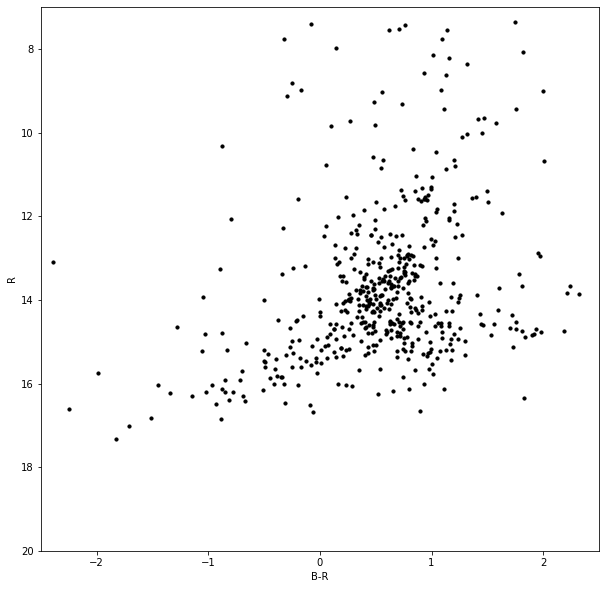

In [19]:
plt.figure(figsize=(10,10))
plt.scatter(all_mags['MAG_3B'] - all_mags['MAG_3R'],
            all_mags['MAG_3R']
            , s = 10, color='black')
plt.ylim(20,7)
plt.xlim(-2.5, 2.5)
plt.xlabel('B-R')
plt.ylabel('R')
plt.show()

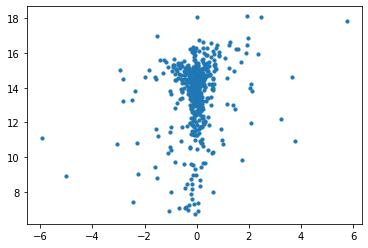

In [20]:
plt.scatter(all_mags['MAG_3G'] - all_mags['MAG_3R'],
            all_mags['MAG_3G']
            , s = 10)
# plt.ylim(10,27)
# plt.xlim(-0.05, 0.05)
plt.show()

Text(0, 0.5, 'B')

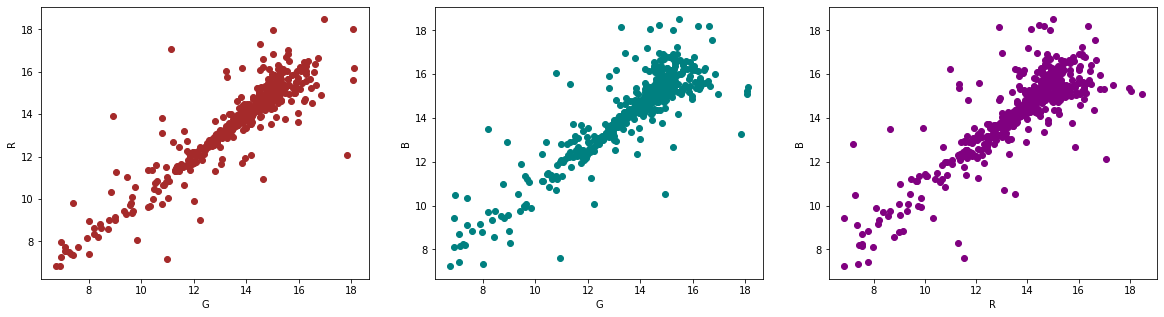

In [21]:
plt.figure(figsize=(20,5))
plt.subplot(1,3,1)
plt.scatter(all_mags['MAG_3G'], all_mags['MAG_3R'], color='brown')
# x = np.linspace(np.min(all_mags['MAG_3G']), np.max(all_mags['MAG_3G']))
# plt.plot(x, x)
plt.xlabel('G')
plt.ylabel('R')
plt.subplot(1,3,2)
plt.scatter(all_mags['MAG_3G'], all_mags['MAG_3B'], color='teal')
plt.xlabel('G')
plt.ylabel('B')
plt.subplot(1,3,3)
plt.scatter(all_mags['MAG_3R'], all_mags['MAG_3B'], color='purple')
plt.xlabel('R')
plt.ylabel('B')